<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Point a

In [1]:
#Import liberries
import numpy as np
import networkx as nx

In [ ]:
#Create the graph
G = nx.DiGraph()
G.add_edge('o', 'a', capacity=3)  # e1
G.add_edge('o', 'b', capacity=3)  # e3
G.add_edge('a', 'd', capacity=2)  # e2
G.add_edge('b', 'd', capacity=2)  # e4
G.add_edge('b', 'c', capacity=3)  # e5
G.add_edge('c', 'd', capacity=1)  # e6
G.add_edge('a', 'b', capacity=1)  # e7


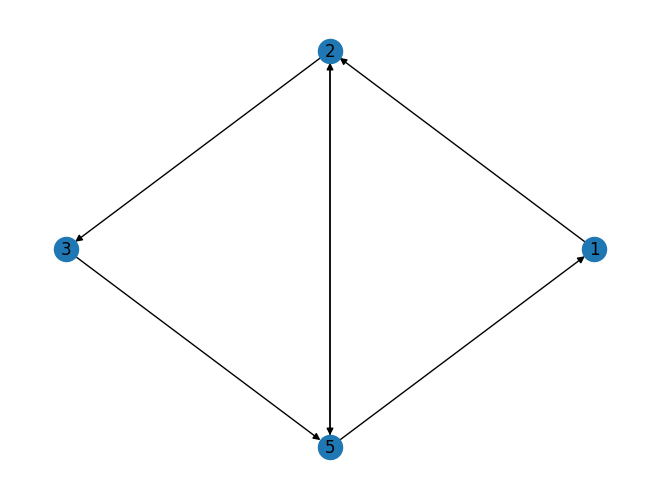

In [ ]:
nx.draw_circular(G, with_labels=True) #We have two rows so it is an undirected graph

## Point b

## Point c